# **1. Baca Dataset**

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('/content/student_admission_record_dirty.csv')

df

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN
...,...,...,...,...,...,...,...
152,Ali,19.0,Female,85.0,78.09,Quetta,Accepted
153,Bilal,17.0,Female,81.0,84.40,Islamabad,Rejected
154,Fatima,21.0,Female,98.0,50.86,Multan,Accepted
155,Shoaib,-1.0,Male,91.0,80.12,Quetta,Accepted


# **2. Cek data yang hilang (missing value)**

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


In [80]:
df.isna().sum()

,0
Name,10
Age,10
Gender,10
Admission Test Score,11
High School Percentage,11
City,10
Admission Status,10


In [81]:
df.describe()

,Age,Admission Test Score,High School Percentage
count,147.000000,146.000000,146.000000
mean,19.680272,77.657534,75.684726
std,4.540512,16.855343,17.368014
min,-1.000000,-5.000000,-10.000000
25%,18.000000,68.250000,65.052500
50%,20.000000,79.000000,77.545000
75%,22.000000,89.000000,88.312500
max,24.000000,150.000000,110.500000


In [82]:
df['Age'].describe()

,Age
count,147.000000
mean,19.680272
std,4.540512
min,-1.000000
25%,18.000000
50%,20.000000
75%,22.000000
max,24.000000


In [83]:
# Mengatasi missing value
for column in df.columns:
    if df[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Jika kolom bertipe numerik, isi dengan mean
        df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-83-da1a6285f769>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-83-da1a6285f769>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [84]:
df.isna().sum()

,0
Name,0
Age,0
Gender,0
Admission Test Score,0
High School Percentage,0
City,0
Admission Status,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    157 non-null    object 
 1   Age                     157 non-null    float64
 2   Gender                  157 non-null    object 
 3   Admission Test Score    157 non-null    float64
 4   High School Percentage  157 non-null    float64
 5   City                    157 non-null    object 
 6   Admission Status        157 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


In [86]:
# Cek data yang error (umur < 0)
df[df['Age'] < 0]

# Hitung rata-rata umur yang valid
mean_age = df[df['Age'] > 0]['Age'].mean()

# Ganti umur negatif dengan mean umur yang valid
df.loc[df['Age'] < 0, 'Age'] = mean_age


In [87]:
# Cek skor yang error (< 0 atau > 100)
df[(df['Admission Test Score'] < 0) | (df['Admission Test Score'] > 100)]

# Hitung rata-rata skor yang valid
mean_score = df[(df['Admission Test Score'] >= 0) & (df['Admission Test Score'] <= 100)]['Admission Test Score'].mean()

# Ganti nilai yang error dengan rata-rata skor valid
df.loc[(df['Admission Test Score'] < 0) | (df['Admission Test Score'] > 100), 'Admission Test Score'] = mean_score


<Axes: title={'center': 'Age'}, xlabel='Age'>

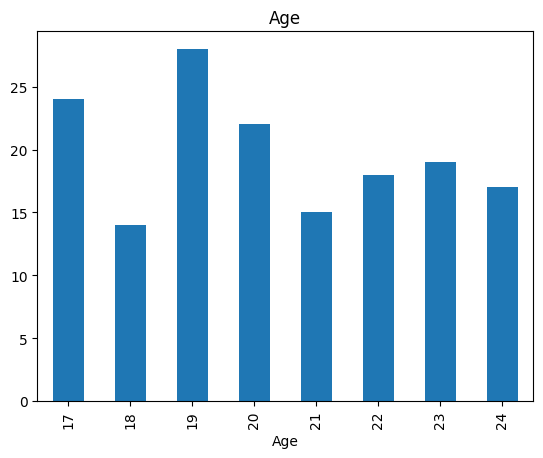

In [88]:
df['Age'] = df['Age'].astype(int)
df['Age'].value_counts().sort_index().plot(kind='bar', title='Age')

# **3. Mengatasi Duplikat Data**

In [89]:
# Mengecek apakah ada duplicate di seluruh kolom
check_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {check_duplicate}")

Jumlah data yang duplikat = 7


In [90]:
# Handling duplicate
df = df.drop_duplicates()

In [91]:
# Mengecek duplicate setelah di-handle
handle_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {handle_duplicate}")

Jumlah data yang duplikat = 0


# **4. Mengecek ulang Data**

In [99]:
df

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24,Female,50.0,68.900000,Quetta,Rejected
1,Waqar,21,Female,99.0,60.730000,Karachi,Rejected
2,Bushra,17,Male,89.0,75.684726,Islamabad,Accepted
3,Aliya,17,Male,55.0,85.290000,Karachi,Rejected
4,Bilal,20,Male,65.0,61.130000,Lahore,Rejected
...,...,...,...,...,...,...,...
152,Ali,19,Female,85.0,78.090000,Quetta,Accepted
153,Bilal,17,Female,81.0,84.400000,Islamabad,Rejected
154,Fatima,21,Female,98.0,50.860000,Multan,Accepted
155,Shoaib,20,Male,91.0,80.120000,Quetta,Accepted


from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Admission Test Score'].plot(kind='hist', bins=20, title='Admission Test Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['High School Percentage'].plot(kind='hist', bins=20, title='High School Percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('City').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Admission Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Admission Test Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Admission Test Score', y='High School Percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Admission Test Score'].plot(kind='line', figsize=(8, 4), title='Admission Test Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['High School Percentage'].plot(kind='line', figsize=(8, 4), title='High School Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['City'].value_counts()
    for x_label, grp in df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('City')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Admission Status'].value_counts()
    for x_label, grp in df.groupby('City')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('City')
_ = plt.ylabel('Admission Status')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['City'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='City', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Admission Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Admission Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Admission Test Score', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [106]:
df.describe(include='all')

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
count,150,150.000000,150,150.000000,150.000000,150,150
unique,64,NaN,2,NaN,NaN,7,2
top,Shehroz,NaN,Female,NaN,NaN,Quetta,Rejected
freq,16,NaN,91,NaN,NaN,39,83
mean,NaN,20.340000,NaN,77.793011,75.255013,NaN,NaN
std,NaN,2.266861,NaN,13.324401,16.860006,NaN,NaN
min,NaN,17.000000,NaN,50.000000,-10.000000,NaN,NaN
25%,NaN,19.000000,NaN,71.000000,65.805000,NaN,NaN
50%,NaN,20.000000,NaN,77.657534,75.684726,NaN,NaN
75%,NaN,22.000000,NaN,89.000000,86.962500,NaN,NaN


In [ ]:
df['Admission Status'].value_counts()

,count
Admission Status,
Rejected,83
Accepted,67


In [98]:
df['City'].value_counts()

,count
City,
Quetta,39
Karachi,26
Multan,18
Islamabad,17
Lahore,17
Peshawar,17
Rawalpindi,16


In [101]:
df['Age'].value_counts()

,count
Age,
19,28
20,22
17,22
23,19
22,17
24,16
21,14
18,12


In [108]:
df['Gender'].value_counts()

,count
Gender,
Female,91
Male,59


In [110]:
df['Admission Status'].value_counts()
df['Admission Status'].value_counts(normalize=True) * 100  # Dalam persen


,proportion
Admission Status,
Rejected,55.333333
Accepted,44.666667
